In [2]:
import pandas as pd
import nltk


In [3]:
train = pd.read_csv('../data/first_task/train.csv', encoding='utf-8')
test = pd.read_csv('../data/first_task/test.csv')
sample = pd.read_csv('../data/first_task/sample_submission.csv')

In [3]:
test

,ID,text
0,0,Развода на деньги нет Наблюдаюсь в Лайфклиник ...
1,1,Отель выбрали потому что рядом со стадионом. О...
2,2,"Вылечили Гноился с рождения глазик, в поликлин..."
3,3,Хорошее расположение.С вокзала дошли пешком.Но...
4,4,"Отличное месторасположение,прекрасный вид,особ..."
...,...,...
21093,21093,Несколько лет назад муж останавливался в этом ...
21094,21094,Спасли от боли После родов у меня появились бо...
21095,21095,з ролика понятно одно - девушка- наблюдатель ...
21096,21096,"Остались всем довольны, дружелюбный персонал, ..."


In [4]:
train.shape

(189891, 3)

In [4]:
stop_words = set(nltk.corpus.stopwords.words('russian'))
stop_words

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [6]:
train

,ID,text,sentiment
0,21098,".с.,и спросил его: о Посланник Аллаха!Ты пори...",1
1,21099,Роднее всех родных Попала я в ГКБ №8 еще в дек...,1
2,21100,Непорядочное отношение к своим работникам Рабо...,2
3,21101,"). Отсутствуют нормативы, Госты и прочее, что ...",1
4,21102,У меня машина в руках 5 лет и это п...,1
...,...,...,...
189886,210984,"Мой юбилей я отмечал в ресторане "" Астория "" ....",2
189887,210985,"Отлично встретили, разместили в роскошном номе...",1
189888,210986,Была в Васаби на ст. метро Сенная . Во первых...,0
189889,210987,Ребята не стоит смотреть этот фильм. Вы молоды...,0


## Data preprocessing

In [14]:
import string


def remove_punctuation(text):
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])


def remove_multiple_spaces_and_links(text):
    pattern = r'[^\w\s]|\d|http\S+'
    text = re.sub(pattern, '', text)
    return re.sub(r'\s+', ' ', text, flags=re.I)


from nltk.stem import *
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

mystem = Mystem()


def lemmatize_text(text):
    text_lem = mystem.lemmatize(text)
    tokens = [token for token in text_lem if token != ' ']
    return " ".join(tokens)

In [15]:
import razdel
import re


# Функция для токенизации текста с использованием библиотеки razdel
def tokenize_text(text):
    tokens = [token.text for token in razdel.tokenize(text)]
    return tokens


def remove_stopwords(text):
    words = text.split()  # Разбиваем текст на слова
    filtered_words = [word.lower() for word in words if
                      word.lower() not in stop_words]  # Фильтруем слова, игнорируя регистр
    return ' '.join(filtered_words)  # Собираем текст обратно


In [7]:
preproccessing = lambda text: (remove_stopwords(remove_multiple_spaces_and_links((remove_punctuation(text)))))
train['preprocessed'] = train['text'].apply(preproccessing)

In [8]:
train['tokenized'] = train['preprocessed'].apply(tokenize_text)
train['tokenized'] = train['tokenized'].apply(lambda x: ' '.join(x))

In [8]:
train['tokenized']

0         спросил посланник аллаха порицаешь слушания от...
1         роднее родных попала гкб декабре г ехать больн...
2         непорядочное отношение своим работникам работа...
3         отсутствуют нормативы госты прочее позволило о...
4         машина руках лет это первая машина могу никак ...
                                ...                        
189886    юбилей отмечал ресторане астория ресторан поль...
189887    отлично встретили разместили роскошном номере ...
189888    васаби ст метро сенная первых ресторан оказалс...
189889    ребята стоит смотреть фильм молодые шутливые л...
189890    махание руками нигде нашел почему сегодня обос...
Name: tokenized, Length: 189891, dtype: object

In [11]:
train = train.drop('lem', axis=1)

KeyError: "['lem'] not found in axis"

In [12]:
train

,ID,text,sentiment,preprocessed,tokenized
0,21098,".с.,и спросил его: о Посланник Аллаха!Ты пори...",1,спросил посланник аллаха порицаешь слушания от...,спросил посланник аллаха порицаешь слушания от...
1,21099,Роднее всех родных Попала я в ГКБ №8 еще в дек...,1,роднее родных попала гкб декабре г ехать больн...,роднее родных попала гкб декабре г ехать больн...
2,21100,Непорядочное отношение к своим работникам Рабо...,2,непорядочное отношение своим работникам работа...,непорядочное отношение своим работникам работа...
3,21101,"). Отсутствуют нормативы, Госты и прочее, что ...",1,отсутствуют нормативы госты прочее позволило о...,отсутствуют нормативы госты прочее позволило о...
4,21102,У меня машина в руках 5 лет и это п...,1,машина руках лет это первая машина могу никак ...,машина руках лет это первая машина могу никак ...
...,...,...,...,...,...
189886,210984,"Мой юбилей я отмечал в ресторане "" Астория "" ....",2,юбилей отмечал ресторане астория ресторан поль...,юбилей отмечал ресторане астория ресторан поль...
189887,210985,"Отлично встретили, разместили в роскошном номе...",1,отлично встретили разместили роскошном номере ...,отлично встретили разместили роскошном номере ...
189888,210986,Была в Васаби на ст. метро Сенная . Во первых...,0,васаби ст метро сенная первых ресторан оказалс...,васаби ст метро сенная первых ресторан оказалс...
189889,210987,Ребята не стоит смотреть этот фильм. Вы молоды...,0,ребята стоит смотреть фильм молодые шутливые л...,ребята стоит смотреть фильм молодые шутливые л...


In [16]:
train['lem'] = train['tokenized'].apply(lemmatize_text)

In [15]:
train['lem']

0         спрашивать посланник аллах порицать слушание о...
1         родной родные попадать гкб декабрь г ехать бол...
2         непорядочный отношение свой работник работать ...
3         отсутствовать норматив гост прочее позволять о...
4         машина рука год это первый машина мочь никак р...
                                ...                        
189886    юбилей отмечать ресторан астория ресторан поль...
189887    отлично встречать размещать роскошный номер ог...
189888    васаби ст метро сенной первый ресторан оказыва...
189889    ребята стоить смотреть фильм молодой шутливый ...
189890    махание рука нигде находить почему сегодня обо...
Name: lem, Length: 189891, dtype: object

In [16]:
train

,ID,text,sentiment,preprocessed,tokenized,lem
0,21098,".с.,и спросил его: о Посланник Аллаха!Ты пори...",1,спросил посланник аллаха порицаешь слушания от...,спросил посланник аллаха порицаешь слушания от...,спрашивать посланник аллах порицать слушание о...
1,21099,Роднее всех родных Попала я в ГКБ №8 еще в дек...,1,роднее родных попала гкб декабре г ехать больн...,роднее родных попала гкб декабре г ехать больн...,родной родные попадать гкб декабрь г ехать бол...
2,21100,Непорядочное отношение к своим работникам Рабо...,2,непорядочное отношение своим работникам работа...,непорядочное отношение своим работникам работа...,непорядочный отношение свой работник работать ...
3,21101,"). Отсутствуют нормативы, Госты и прочее, что ...",1,отсутствуют нормативы госты прочее позволило о...,отсутствуют нормативы госты прочее позволило о...,отсутствовать норматив гост прочее позволять о...
4,21102,У меня машина в руках 5 лет и это п...,1,машина руках лет это первая машина могу никак ...,машина руках лет это первая машина могу никак ...,машина рука год это первый машина мочь никак р...
...,...,...,...,...,...,...
189886,210984,"Мой юбилей я отмечал в ресторане "" Астория "" ....",2,юбилей отмечал ресторане астория ресторан поль...,юбилей отмечал ресторане астория ресторан поль...,юбилей отмечать ресторан астория ресторан поль...
189887,210985,"Отлично встретили, разместили в роскошном номе...",1,отлично встретили разместили роскошном номере ...,отлично встретили разместили роскошном номере ...,отлично встречать размещать роскошный номер ог...
189888,210986,Была в Васаби на ст. метро Сенная . Во первых...,0,васаби ст метро сенная первых ресторан оказалс...,васаби ст метро сенная первых ресторан оказалс...,васаби ст метро сенной первый ресторан оказыва...
189889,210987,Ребята не стоит смотреть этот фильм. Вы молоды...,0,ребята стоит смотреть фильм молодые шутливые л...,ребята стоит смотреть фильм молодые шутливые л...,ребята стоить смотреть фильм молодой шутливый ...


In [17]:
train = train.drop('tokenized', axis=1)

In [18]:
train

,ID,text,sentiment,preprocessed,lem
0,21098,".с.,и спросил его: о Посланник Аллаха!Ты пори...",1,спросил посланник аллаха порицаешь слушания от...,спрашивать посланник аллах порицать слушание о...
1,21099,Роднее всех родных Попала я в ГКБ №8 еще в дек...,1,роднее родных попала гкб декабре г ехать больн...,родной родные попадать гкб декабрь г ехать бол...
2,21100,Непорядочное отношение к своим работникам Рабо...,2,непорядочное отношение своим работникам работа...,непорядочный отношение свой работник работать ...
3,21101,"). Отсутствуют нормативы, Госты и прочее, что ...",1,отсутствуют нормативы госты прочее позволило о...,отсутствовать норматив гост прочее позволять о...
4,21102,У меня машина в руках 5 лет и это п...,1,машина руках лет это первая машина могу никак ...,машина рука год это первый машина мочь никак р...
...,...,...,...,...,...
189886,210984,"Мой юбилей я отмечал в ресторане "" Астория "" ....",2,юбилей отмечал ресторане астория ресторан поль...,юбилей отмечать ресторан астория ресторан поль...
189887,210985,"Отлично встретили, разместили в роскошном номе...",1,отлично встретили разместили роскошном номере ...,отлично встречать размещать роскошный номер ог...
189888,210986,Была в Васаби на ст. метро Сенная . Во первых...,0,васаби ст метро сенная первых ресторан оказалс...,васаби ст метро сенной первый ресторан оказыва...
189889,210987,Ребята не стоит смотреть этот фильм. Вы молоды...,0,ребята стоит смотреть фильм молодые шутливые л...,ребята стоить смотреть фильм молодой шутливый ...


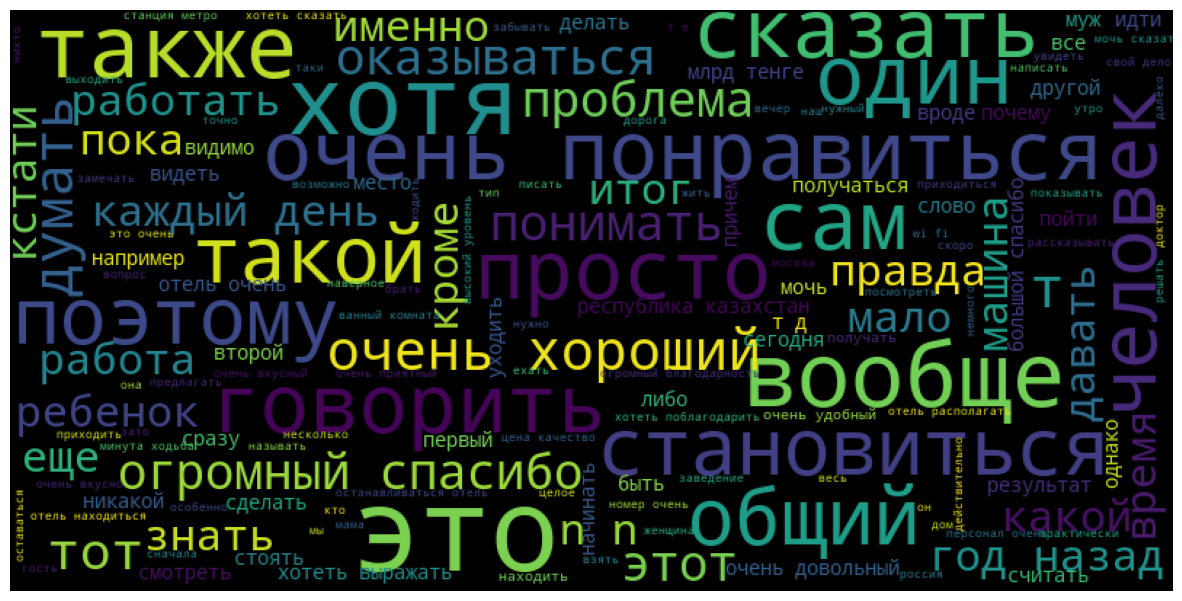

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=2,
        random_state=1
    ).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(train['lem'])

### Мы предобработали данные, теперь попробуем получить предсказания с помощью MultinomialNB

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
               ])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['lem'], train['sentiment'], random_state=24, test_size=0.2,
                                                    shuffle=True)


In [23]:
%%time
nb.fit(X_train, y_train)

CPU times: user 4.28 s, sys: 90.7 ms, total: 4.37 s
Wall time: 4.41 s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [24]:
y_pred = nb.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)

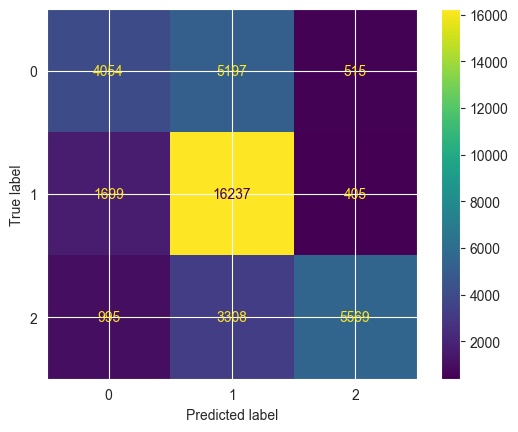

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

### Посмотрим на F1-score

In [28]:
from sklearn.metrics import f1_score

# y_true - истинные метки классов для тестового набора данных
# y_pred - предсказанные метки классов от модели

# Вычисляем F1-меру для мультиклассовой классификации
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.6672110461660734

Не густо, попробуем предсказать на test датасете

Для этого его также надо предобработать

## Test dataset preprocessing

In [20]:
test['preprocessed'] = test['text'].apply(preproccessing)

In [21]:
test['tokenized'] = test['preprocessed'].apply(tokenize_text)
test['tokenized'] = test['tokenized'].apply(lambda x: ' '.join(x))

In [22]:
test['lem'] = test['tokenized'].apply(lemmatize_text)

In [14]:
test

,ID,text,preprocessed,tokenized,lem
0,0,Развода на деньги нет Наблюдаюсь в Лайфклиник ...,развода деньги наблюдаюсь лайфклиник беременно...,развода деньги наблюдаюсь лайфклиник беременно...,развод деньги наблюдаться лайфклиника беременн...
1,1,Отель выбрали потому что рядом со стадионом. О...,отель выбрали рядом стадионом отель номер боль...,отель выбрали рядом стадионом отель номер боль...,отель выбирать рядом стадион отель номер больш...
2,2,"Вылечили Гноился с рождения глазик, в поликлин...",вылечили гноился рождения глазик поликлинике н...,вылечили гноился рождения глазик поликлинике н...,вылечивать гноиться рождение глазик поликлиник...
3,3,Хорошее расположение.С вокзала дошли пешком.Но...,хорошее расположение вокзала дошли пешком ночь...,хорошее расположение вокзала дошли пешком ночь...,хороший расположение вокзал доходить пешком но...
4,4,"Отличное месторасположение,прекрасный вид,особ...",отличное месторасположение прекрасный вид особ...,отличное месторасположение прекрасный вид особ...,отличный месторасположение прекрасный вид особ...
...,...,...,...,...,...
21093,21093,Несколько лет назад муж останавливался в этом ...,несколько лет назад муж останавливался отеле б...,несколько лет назад муж останавливался отеле б...,несколько год назад муж останавливаться отель ...
21094,21094,Спасли от боли После родов у меня появились бо...,спасли боли родов появились боли позвоночнике ...,спасли боли родов появились боли позвоночнике ...,спасать боль род появляться боль позвоночник б...
21095,21095,з ролика понятно одно - девушка- наблюдатель ...,з ролика понятно одно девушка наблюдатель спер...,з ролика понятно одно девушка наблюдатель спер...,з ролик понятно один девушка наблюдатель спира...
21096,21096,"Остались всем довольны, дружелюбный персонал, ...",остались всем довольны дружелюбный персонал хо...,остались всем довольны дружелюбный персонал хо...,оставаться все довольный дружелюбный персонал ...


In [33]:
test['sentiment'] = nb.predict(test['lem'])

In [34]:
answer = pd.DataFrame()
answer["ID"] = test['ID']
answer['sentiment'] = test['sentiment']
answer.to_csv('../outputs/from_nb.csv', index=False)

In [35]:
answer

,ID,sentiment
0,0,2
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
21093,21093,1
21094,21094,1
21095,21095,0
21096,21096,1


#### F1-score AllCups  0.654

### Теперь попробуем логистическую регрессию

**В этот раз учтем дизбалланс классов**

In [23]:
from sklearn.utils import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(train['sentiment']), y=train['sentiment'])
class_weights

array([1.28321203, 0.69736465, 1.27107514])

In [24]:
%%time
from sklearn.metrics import make_scorer

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

f1_scorer = make_scorer(f1_score, average='weighted')
# Определение пайплайна
sgd_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',
     SGDClassifier(loss='log_loss', penalty='l2', random_state=42, max_iter=10, tol=1e-3, class_weight='balanced'))
])

# Подбор оптимальных параметров с помощью GridSearchCV
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],  # разные диапазоны n-грамм
    'tfidf__use_idf': [True, False],  # использовать ли TF-IDF
    'clf__alpha': [1e-3, 1e-4]  # разные значения параметра alpha
}

grid_search = GridSearchCV(sgd_pipeline, param_grid, scoring=f1_scorer)


NameError: name 'f1_score' is not defined

In [212]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 10min 8s, sys: 52.5 s, total: 11min 1s
Wall time: 9min 45s


GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        SGDClassifier(class_weight='balanced',
                                                      loss='log_loss',
                                                      max_iter=10,
                                                      random_state=42))]),
             param_grid={'clf__alpha': [0.001, 0.0001],
                         'tfidf__use_idf': [True, False],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, response_method='predict', average=weighted))

In [213]:
grid_search.best_params_

{'clf__alpha': 0.0001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

In [215]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

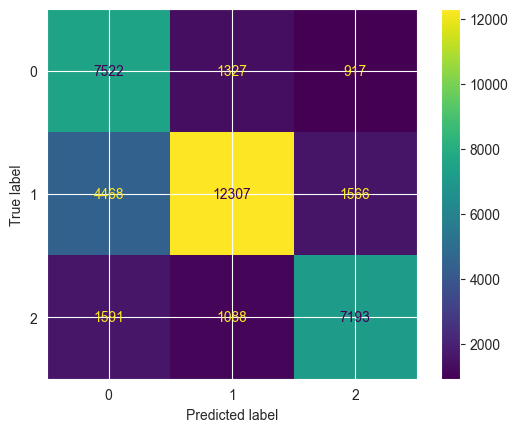

In [216]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [217]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.7165035992966049

In [43]:
test

,ID,text,preprocessed,tokenized,lem,sentiment
0,0,Развода на деньги нет Наблюдаюсь в Лайфклиник ...,развода деньги наблюдаюсь лайфклиник беременно...,развода деньги наблюдаюсь лайфклиник беременно...,развод деньги наблюдаться лайфклиника беременн...,2
1,1,Отель выбрали потому что рядом со стадионом. О...,отель выбрали рядом стадионом отель номер боль...,отель выбрали рядом стадионом отель номер боль...,отель выбирать рядом стадион отель номер больш...,0
2,2,"Вылечили Гноился с рождения глазик, в поликлин...",вылечили гноился рождения глазик поликлинике н...,вылечили гноился рождения глазик поликлинике н...,вылечивать гноиться рождение глазик поликлиник...,1
3,3,Хорошее расположение.С вокзала дошли пешком.Но...,хорошее расположение вокзала дошли пешком ночь...,хорошее расположение вокзала дошли пешком ночь...,хороший расположение вокзал доходить пешком но...,0
4,4,"Отличное месторасположение,прекрасный вид,особ...",отличное месторасположение прекрасный вид особ...,отличное месторасположение прекрасный вид особ...,отличный месторасположение прекрасный вид особ...,1
...,...,...,...,...,...,...
21093,21093,Несколько лет назад муж останавливался в этом ...,несколько лет назад муж останавливался отеле б...,несколько лет назад муж останавливался отеле б...,несколько год назад муж останавливаться отель ...,1
21094,21094,Спасли от боли После родов у меня появились бо...,спасли боли родов появились боли позвоночнике ...,спасли боли родов появились боли позвоночнике ...,спасать боль род появляться боль позвоночник б...,1
21095,21095,з ролика понятно одно - девушка- наблюдатель ...,з ролика понятно одно девушка наблюдатель спер...,з ролика понятно одно девушка наблюдатель спер...,з ролик понятно один девушка наблюдатель спира...,0
21096,21096,"Остались всем довольны, дружелюбный персонал, ...",остались всем довольны дружелюбный персонал хо...,остались всем довольны дружелюбный персонал хо...,оставаться все довольный дружелюбный персонал ...,1


In [44]:
test = test.drop('sentiment', axis=1)

In [45]:
%%time
# Предсказание с использованием лучшей модели
test['sentiment'] = best_model.predict(test['lem'])

CPU times: user 761 ms, sys: 15.8 ms, total: 776 ms
Wall time: 638 ms


In [46]:
answer = pd.DataFrame()
answer["ID"] = test['ID']
answer['sentiment'] = test['sentiment']
answer.to_csv('../outputs/from_sgd.csv', index=False)

#### All cups F1-score 0.71, уже значительно лучше

Ради интереса хочу поменять tol на более низкий и увеличить max_iter, оставив те же параметры

In [47]:
modified_sgd_pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 1))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf',
     SGDClassifier(loss='log_loss', penalty='l2', random_state=42, max_iter=1000, tol=1e-3, class_weight='balanced',
                   alpha=0.0001))
])

In [48]:
%%time
modified_sgd_pipeline.fit(X_train, y_train)

CPU times: user 5.51 s, sys: 132 ms, total: 5.64 s
Wall time: 5.74 s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(class_weight='balanced', loss='log_loss',
                               random_state=42))])

In [49]:
test.drop('sentiment', axis=1)

,ID,text,preprocessed,tokenized,lem
0,0,Развода на деньги нет Наблюдаюсь в Лайфклиник ...,развода деньги наблюдаюсь лайфклиник беременно...,развода деньги наблюдаюсь лайфклиник беременно...,развод деньги наблюдаться лайфклиника беременн...
1,1,Отель выбрали потому что рядом со стадионом. О...,отель выбрали рядом стадионом отель номер боль...,отель выбрали рядом стадионом отель номер боль...,отель выбирать рядом стадион отель номер больш...
2,2,"Вылечили Гноился с рождения глазик, в поликлин...",вылечили гноился рождения глазик поликлинике н...,вылечили гноился рождения глазик поликлинике н...,вылечивать гноиться рождение глазик поликлиник...
3,3,Хорошее расположение.С вокзала дошли пешком.Но...,хорошее расположение вокзала дошли пешком ночь...,хорошее расположение вокзала дошли пешком ночь...,хороший расположение вокзал доходить пешком но...
4,4,"Отличное месторасположение,прекрасный вид,особ...",отличное месторасположение прекрасный вид особ...,отличное месторасположение прекрасный вид особ...,отличный месторасположение прекрасный вид особ...
...,...,...,...,...,...
21093,21093,Несколько лет назад муж останавливался в этом ...,несколько лет назад муж останавливался отеле б...,несколько лет назад муж останавливался отеле б...,несколько год назад муж останавливаться отель ...
21094,21094,Спасли от боли После родов у меня появились бо...,спасли боли родов появились боли позвоночнике ...,спасли боли родов появились боли позвоночнике ...,спасать боль род появляться боль позвоночник б...
21095,21095,з ролика понятно одно - девушка- наблюдатель ...,з ролика понятно одно девушка наблюдатель спер...,з ролика понятно одно девушка наблюдатель спер...,з ролик понятно один девушка наблюдатель спира...
21096,21096,"Остались всем довольны, дружелюбный персонал, ...",остались всем довольны дружелюбный персонал хо...,остались всем довольны дружелюбный персонал хо...,оставаться все довольный дружелюбный персонал ...


In [50]:
test['sentiment'] = modified_sgd_pipeline.predict(test['lem'])

In [51]:
answer = pd.DataFrame()
answer["ID"] = test['ID']
answer['sentiment'] = test['sentiment']
answer.to_csv('../outputs/from_sgd_modified.csv', index=False)

На 1 сотую процента больше, успех

TfIdf плох тем, что не учитывает контекст слов, что может быть критично в русском языке

## Попробуем FastText+SVC

0         спрашивать посланник аллах порицать слушание о...
1         родной родные попадать гкб декабрь г ехать бол...
2         непорядочный отношение свой работник работать ...
3         отсутствовать норматив гост прочее позволять о...
4         машина рука год это первый машина мочь никак р...
                                ...                        
189886    юбилей отмечать ресторан астория ресторан поль...
189887    отлично встречать размещать роскошный номер ог...
189888    васаби ст метро сенной первый ресторан оказыва...
189889    ребята стоить смотреть фильм молодой шутливый ...
189890    махание рука нигде находить почему сегодня обо...
Name: lem, Length: 189891, dtype: object

In [189]:
print([text.split() for text in train['lem']][0])

['спрашивать', 'посланник', 'аллах', 'порицать', 'слушание', 'отвечать', 'порицать', 'передавать', 'открывать', 'свой', 'собрание', 'коран', 'закрывать', 'коран', 'это', 'доходить', 'мнение', 'находиться', 'поиск', 'истина', 'мера', 'изучение', 'вопрос', 'сталкиваться', 'разногласие', 'оставаться', 'растерянность', 'склоняться', 'мнение', 'один', 'сторона', 'свой', 'желание', 'недостаточно', 'должный', 'находить', 'истина', 'подробно', 'изучать', 'вопрос', 'запретный', 'разрешать', 'обращать', 'внимание', 'основатель', 'четыре', 'мазхабов', 'осуждать', 'песня', 'поэззия', 'этот', 'часто', 'грешить', 'заблудший', 'суфий', 'исключение', 'делаться', 'исламский', 'тематика', 'сахих', 'бухарио', 'проявление', 'радость', 'время', 'праздник', 'сообщаться', 'аиша', 'довольный', 'она', 'аллах', 'сказать', 'однажды', 'посланник', 'аллах', 'благословлять', 'аллах', 'приветствовать', 'входить', 'ко', 'время', 'находиться', 'два', 'девушка', 'петь', 'песня', 'буас', 'ложиться', 'постель', 'отвертыв

In [25]:
from gensim.models import FastText

sentences = [text.split() for text in train['lem']]

# Обучение модели FastText
ft_model = FastText(sentences, window=7, min_count=1, workers=4, sg=1)
sentences

[['спрашивать',
  'посланник',
  'аллах',
  'порицать',
  'слушание',
  'отвечать',
  'порицать',
  'передавать',
  'открывать',
  'свой',
  'собрание',
  'коран',
  'закрывать',
  'коран',
  'это',
  'доходить',
  'мнение',
  'находиться',
  'поиск',
  'истина',
  'мера',
  'изучение',
  'вопрос',
  'сталкиваться',
  'разногласие',
  'оставаться',
  'растерянность',
  'склоняться',
  'мнение',
  'один',
  'сторона',
  'свой',
  'желание',
  'недостаточно',
  'должный',
  'находить',
  'истина',
  'подробно',
  'изучать',
  'вопрос',
  'запретный',
  'разрешать',
  'обращать',
  'внимание',
  'основатель',
  'четыре',
  'мазхабов',
  'осуждать',
  'песня',
  'поэззия',
  'этот',
  'часто',
  'грешить',
  'заблудший',
  'суфий',
  'исключение',
  'делаться',
  'исламский',
  'тематика',
  'сахих',
  'бухарио',
  'проявление',
  'радость',
  'время',
  'праздник',
  'сообщаться',
  'аиша',
  'довольный',
  'она',
  'аллах',
  'сказать',
  'однажды',
  'посланник',
  'аллах',
  'благослов

сохраним модельку

In [191]:
model_path = "../models/ft_model.bin"
ft_model.save(model_path)

In [192]:
ft_model.wv['король'] - ft_model.wv['мужчина'] + ft_model.wv['женщина']

array([-0.0367845 ,  0.31299806, -0.2975763 ,  0.09420389,  0.18626341,
        0.3088625 , -0.17942922, -0.18464878, -0.42010406, -0.02738409,
       -0.30887073, -0.93812776, -0.3593314 , -0.23066579, -0.23674476,
       -0.12826788,  0.13870926,  0.1846782 ,  0.21194747,  0.31145954,
       -0.32012513, -0.59477717, -0.15912977,  0.3009981 , -0.13100731,
        0.28056192, -0.39810854, -0.8066373 ,  0.01375586,  0.43662626,
        0.22660881,  0.5198647 ,  0.03336051,  0.6389413 ,  0.13528687,
        0.0798393 , -0.57314366, -0.24739417, -0.06695697,  0.32350624,
       -0.14832962, -0.19909894, -0.28915858, -0.11847343, -0.04443908,
       -0.06234996, -0.5873213 ,  0.09394066,  0.3584231 ,  0.21834111,
        0.05763926, -0.44131362,  0.4817117 ,  0.33341476,  0.27814546,
        0.2933315 ,  0.26022944, -0.11004353, -0.35061115,  0.09899962,
        0.1345737 , -0.0574491 , -0.74572724,  0.32924622, -0.16570123,
       -0.01588649,  0.03417718,  0.5789162 , -0.6901362 , -0.27

In [193]:
X_train

77105     работить пытаться поставлять пломба передний з...
154556    выражать благодарность врач кардиолог обращать...
144309    ca news kg кыргызстан наблюдаться резкий подъе...
87530     отдельный спасибо руководство здравствовать по...
159444    лечение пациент приходить клиника ужасный плом...
                                ...                        
145412    просто хороший стоматология люберцы отзыв стом...
143483    искренне понимать такой шумиха вокруг склоннос...
6500      впереди юбилей решать отмечать этот мероприяти...
152705    замечательный ресторан бывать он меню появлять...
899       жить неделя каждый день огромный минус уборщиц...
Name: lem, Length: 151912, dtype: object

In [194]:
y_train


77105     2
154556    1
144309    0
87530     1
159444    2
         ..
145412    1
143483    0
6500      2
152705    2
899       0
Name: sentiment, Length: 151912, dtype: int64

In [62]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


# Класс для извлечения векторных представлений текста с использованием FastText
class FastTextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, fasttext_model):
        self.fasttext_model = fasttext_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        vectors = []
        for text in X:
            word_vectors = [self.fasttext_model.wv[word] for word in text.split() if word in self.fasttext_model.wv]
            if word_vectors:
                sentence_vector = np.mean(word_vectors, axis=0)
            else:
                # Если для текста нет векторов слов (например, если текст состоит только из стоп-слов), используем нулевой вектор
                sentence_vector = np.zeros(self.fasttext_model.vector_size)
            vectors.append(sentence_vector)
        return np.array(vectors)


# Создание Pipeline
pipeline = Pipeline([
    ('text_to_vector', FastTextVectorizer(ft_model)),
    ('classifier', SVC(kernel='linear'))  # Используем линейное ядро для классификатора SVC
])

# Преобразование pd.Series в список
X_train_list = X_train.tolist()
y_train_list = y_train.tolist()

# Обучение pipeline
pipeline.fit(X_train_list, y_train_list)


Pipeline(steps=[('text_to_vector',
                 FastTextVectorizer(fasttext_model=<gensim.models.fasttext.FastText object at 0x2f27d5fd0>)),
                ('classifier', SVC(kernel='linear'))])

In [64]:
import joblib

joblib.dump(pipeline, '../models/svc_lin.pkl')


['../models/svc_lin.pkl']

In [71]:
X_test

89273     благодарить участие последний время мой жизнь ...
73797     хотеть особо отмечать расположение отель минут...
184424    отель отличный расположение район сиркедж тихи...
37884     маленький отель очень удобный расположение ули...
40715     ресторан привлекать уютный атмосфера сохранять...
                                ...                        
132529    благотворительный фонд адал просить житель акт...
83153     целое отель неплохой качественный интерьер рем...
53380     ошибаться выбор отель останавливаться оживленн...
82439     ездить барселона июль останавливаться отель оч...
67860     спасибо доктор богданов обращаться клиника ден...
Name: lem, Length: 37979, dtype: object

In [72]:
y_pr = pipeline.predict(test['lem'])

In [73]:
y_pr

array([2, 0, 1, ..., 2, 1, 1])

In [67]:
test = test.drop('sentiment', axis=1)

In [69]:
test

,ID,text,preprocessed,tokenized,lem
0,0,Развода на деньги нет Наблюдаюсь в Лайфклиник ...,развода деньги наблюдаюсь лайфклиник беременно...,развода деньги наблюдаюсь лайфклиник беременно...,развод деньги наблюдаться лайфклиника беременн...
1,1,Отель выбрали потому что рядом со стадионом. О...,отель выбрали рядом стадионом отель номер боль...,отель выбрали рядом стадионом отель номер боль...,отель выбирать рядом стадион отель номер больш...
2,2,"Вылечили Гноился с рождения глазик, в поликлин...",вылечили гноился рождения глазик поликлинике н...,вылечили гноился рождения глазик поликлинике н...,вылечивать гноиться рождение глазик поликлиник...
3,3,Хорошее расположение.С вокзала дошли пешком.Но...,хорошее расположение вокзала дошли пешком ночь...,хорошее расположение вокзала дошли пешком ночь...,хороший расположение вокзал доходить пешком но...
4,4,"Отличное месторасположение,прекрасный вид,особ...",отличное месторасположение прекрасный вид особ...,отличное месторасположение прекрасный вид особ...,отличный месторасположение прекрасный вид особ...
...,...,...,...,...,...
21093,21093,Несколько лет назад муж останавливался в этом ...,несколько лет назад муж останавливался отеле б...,несколько лет назад муж останавливался отеле б...,несколько год назад муж останавливаться отель ...
21094,21094,Спасли от боли После родов у меня появились бо...,спасли боли родов появились боли позвоночнике ...,спасли боли родов появились боли позвоночнике ...,спасать боль род появляться боль позвоночник б...
21095,21095,з ролика понятно одно - девушка- наблюдатель ...,з ролика понятно одно девушка наблюдатель спер...,з ролика понятно одно девушка наблюдатель спер...,з ролик понятно один девушка наблюдатель спира...
21096,21096,"Остались всем довольны, дружелюбный персонал, ...",остались всем довольны дружелюбный персонал хо...,остались всем довольны дружелюбный персонал хо...,оставаться все довольный дружелюбный персонал ...


In [74]:
test['sentiment'] = y_pr

In [75]:
answer = pd.DataFrame()
answer["ID"] = test['ID']
answer['sentiment'] = test['sentiment']
answer.to_csv('../outputs/from_svc_lin.csv', index=False)

#### All cups F1-score 0.705

Попробуем другое ядро

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
class FastTextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, fasttext_model):
        self.fasttext_model = fasttext_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        vectors = []
        for text in X:
            word_vectors = [self.fasttext_model.wv[word] for word in text.split() if word in self.fasttext_model.wv]
            if word_vectors:
                sentence_vector = np.mean(word_vectors, axis=0)
            else:
                # Если для текста нет векторов слов (например, если текст состоит только из стоп-слов), используем нулевой вектор
                sentence_vector = np.zeros(self.fasttext_model.vector_size)
            vectors.append(sentence_vector)
        return np.array(vectors)


In [ ]:

# Класс для извлечения векторных представлений текста с использованием FastText


# Создание Pipeline
pipeline = Pipeline([
    ('text_to_vector', FastTextVectorizer(ft_model)),
    (
        'clf',
        SGDClassifier(loss='log_loss', penalty='l2', random_state=42, max_iter=10, tol=1e-3, class_weight='balanced',
                      alpha=0.0001))
])

# Преобразование pd.Series в список
X_train_list = X_train.tolist()
y_train_list = y_train.tolist()

# Обучение pipeline
pipeline.fit(X_train_list, y_train_list)


/Users/antontagiev/PycharmProjects/text_summarization_sirius/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/antontagiev/PycharmProjects/text_summarization_sirius/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/antontagiev/PycharmProjects/text_summarization_sirius/venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/antontagiev/PycharmProjects/text_summarization_sirius/venv/lib/python3.11/site

KeyboardInterrupt: 

In [94]:
y_pr = pipeline.predict(test['lem'])

In [95]:
test = test.drop('sentiment', axis=1)
test['sentiment'] = y_pr
answer = pd.DataFrame()
answer["ID"] = test['ID']
answer['sentiment'] = test['sentiment']
answer.to_csv('../outputs/from_sgd_ft.csv', index=False)

In [27]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
f1_scorer = make_scorer(f1_score, average='weighted')

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
# Определение пайплайна
random_forest_pipeline = Pipeline([
    ('text_to_vector', FastTextVectorizer(ft_model)),
    ('clf', RandomForestClassifier(random_state=42,max_depth=15,n_estimators=100,min_samples_split=2))
])

# Подбор оптимальных параметров с помощью GridSearchCV
# param_grid = {
#     'clf__max_depth': [10,15, 20],  # максимальная глубина деревьев
#     'clf__min_samples_split': [2, 5],  # минимальное количество образцов для разделения
#     'clf__n_estimators':[100,200]
# }
#
# grid_search = GridSearchCV(random_forest_pipeline, param_grid, cv=5, scoring=f1_scorer)


In [73]:
tr=pd.read_csv('../outputs/truesubmission3.csv')
tr

In [72]:
y_pre=random_forest_pipeline.predict(test['lem'])

In [73]:
y_pre


Pipeline(steps=[('text_to_vector',
                 FastTextVectorizer(fasttext_model=<gensim.models.fasttext.FastText object at 0x337fe4910>)),
                ('clf', RandomForestClassifier(max_depth=15, random_state=42))])

In [68]:
tr=pd.read_csv('../outputs/truesubmission3.csv')
tr

In [61]:
from sklearn.metrics import f1_score

# Предположим, что у вас есть предсказания (y_pred) и истинные метки (y_true)
# y_pred и y_true должны быть массивами той же формы и содержать целочисленные метки классов

# Вычисляем взвешенную F1-меру

f1_score(y_pre,tr['0'],average='weighted')

In [69]:
grid_search.best_params_

0.8455667135202237

In [200]:
fast_hinge = grid_search.best_estimator_

In [202]:
test = test.drop('sentiment', axis=1)

In [75]:
pred = fast_hinge.predict(test['lem'])

['../models/best_model.pkl']

In [72]:
pred

In [41]:

answer = pd.DataFrame()
answer["ID"] = test['ID']
answer['sentiment'] = y_pre
answer.to_csv('../outputs/forest_fast.csv', index=False)

In [70]:
answer

,0,ID
0,1,0
1,1,1
2,2,2
3,1,3
4,0,4
...,...,...
21093,1,21093
21094,1,21094
21095,1,21095
21096,1,21096


IndexError: index 1 is out of bounds for axis 0 with size 1

,0
0,1
1,1
2,2
3,1
4,0
...,...
21093,1
21094,1
21095,1
21096,1


array([1, 1, 2, ..., 1, 1, 0])